##### Imports

In [1]:
import pandas as pd
import seaborn as sns
import time as t

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


%matplotlib inline

##### Initialize functions

In [2]:
def get_iris_dataset() -> pd.DataFrame:
    """
    Loads the iris data set and converts it to a Pandas Data Frame
    :return: pandas data frame
    """
    iris_data = load_iris()
    return pd.DataFrame(iris_data.data, columns=iris_data.feature_names)


def pca_transformation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Takes a data frame and transforms it to a principal component analysis data frame,
    containing to 2 principal components
    :param data: pandas data frame, the data to transform to PCA data frame
    :return: pandas data frame
    """
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    return pd.DataFrame(data=principal_components,
                        columns=['principal component 1', 'principal component 2'])


def elbow_method(data: pd.DataFrame) -> (range, list):
    """
    Takes a data frame and iterates a given number of times to get the most optimized number of
    clusters for the data points in the data frame
    :param data: pandas data frame, the data frame to test the best k-value on
    :return: tuple, the range of k-values tested and a list of the k-means inertia
    """
    sse = []
    k_range = range(1, 10)

    for k in k_range:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        sse.append(k_means.inertia_)

    return k_range, sse


def timer_kmeans(data: pd.DataFrame, clusters: int, iterations: int) -> float:
    """
    Timer function.
    Takes a data frame and returns the time it takes for the KMeans to calculate its result
    :param data: pandas data frame, the data frame to time
    :param clusters: int, number of clusters to test the kmeans with
    :param iterations: int, maximal number of iterations to test
    :return: float, the time (in seconds) that the kmeans takes to calculate the data frame
    """
    start = t.perf_counter()
    KMeans(n_clusters=clusters, max_iter=iterations, init='random').fit(data)
    stop = t.perf_counter()

    return stop - start

# Tasks for passing grade

##### Initialize data set and all available attribute combinations (of two attributes)

In [3]:
df = get_iris_dataset()
colors = ['blue', 'green', 'yellow', 'red', 'black', 'grey']
combinations = [
    (df['sepal length (cm)'], df['sepal width (cm)']),
    (df['sepal length (cm)'], df['petal length (cm)']),
    (df['sepal length (cm)'], df['petal width (cm)']),
    (df['sepal width (cm)'], df['petal length (cm)']),
    (df['sepal width (cm)'], df['petal width (cm)']),
    (df['petal length (cm)'], df['petal width (cm)'])
]

df
print(df.shape)

(150, 4)


##### Distribution of the attributes
To see the distribution I used Seaborn, mainly because I wanted to test that library and see how it is different from other libraries.<br>
In the data frame I used the target attribute to get the number of different flowers the data set contains.

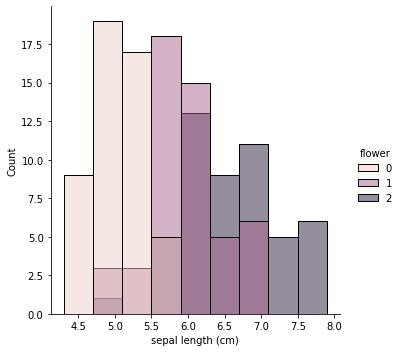

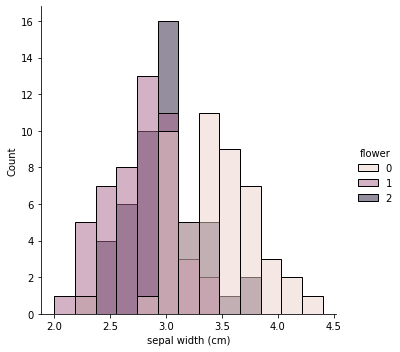

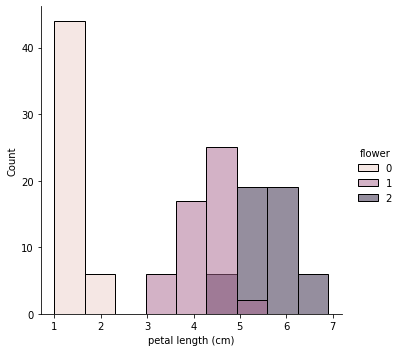

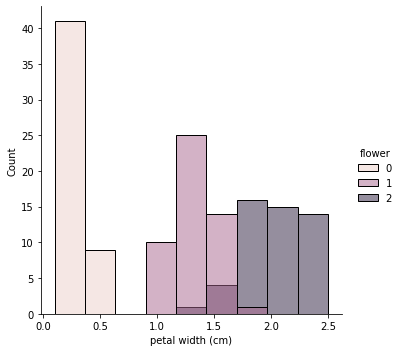

In [7]:
df['flower'] = load_iris().target
sns.displot(df, x='sepal length (cm)', hue='flower')
sns.displot(df, x='sepal width (cm)', hue='flower')
sns.displot(df, x='petal length (cm)', hue='flower')
sns.displot(df, x='petal width (cm)', hue='flower')

##### Test elbow method to get the most accurate number of _k_
I used 'the elbow method', first with the whole dataframe and then with just 2 attributes, to get the _k_-value for the number of clusters to use. The _k_-value should be the number where the curve flattens out.<br><br>
My analysis shows that if you enter the whole dataframe, the _k_-value is clearly 3. But if you just enter 2 attributes the curve sharply flattens out by 3, but then again (mor subtle this time) at 5. The correct answer is then, probably, 3 clusters (there is also 3 flower types in the data set, as my distribution analysis showed), but I'm going to cluster the data both in 3 and 5 clusters, just to see the difference.

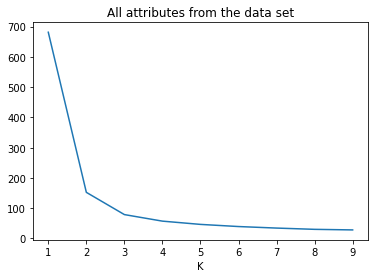

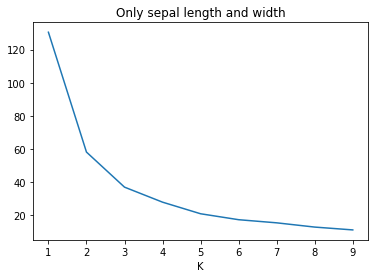

In [4]:
plt.figure()
plt.title('All attributes from the data set')
plt.xlabel('K')
plt.plot(*elbow_method(df))

plt.figure()
plt.title('Only sepal length and width')
plt.xlabel('K')
plt.plot(*elbow_method(df[['sepal length (cm)', 'sepal width (cm)']]))
plt.show()

##### Test to see which attributes that are the most appropriate to use with the K-Means algorithm
I go through all possible attribute combinations to see which are the most collected.<br>
The result shows that sepal length, sepal width are the most collected and therefor the attributes I will continue work with.
I iterate through all combinatations, first with 3 clusters and then with 5 clusters, and there isn't much difference. Tho in my opinion, I think that there is more clear to which cluster each data point belongs to with 5 center points than with 3.

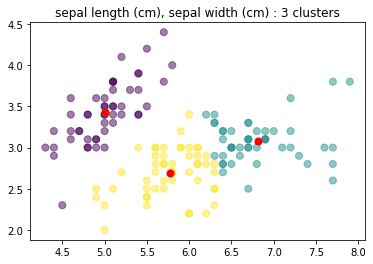

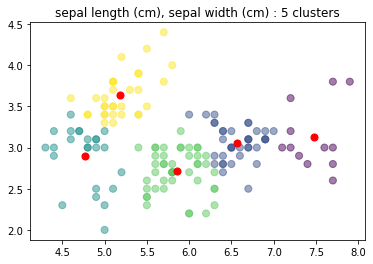

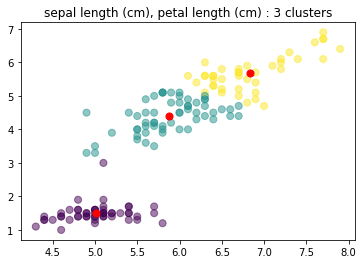

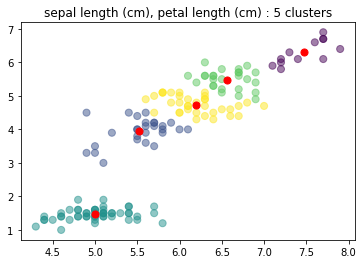

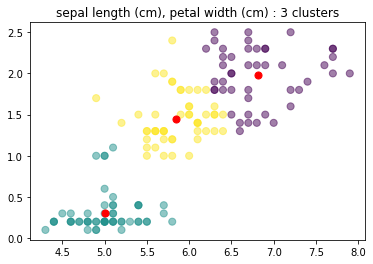

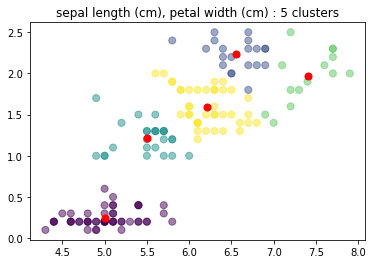

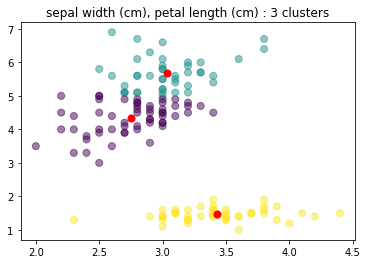

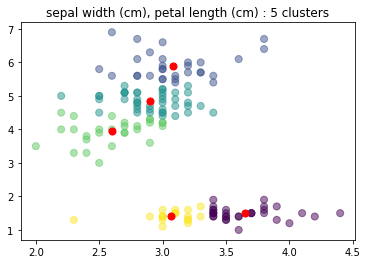

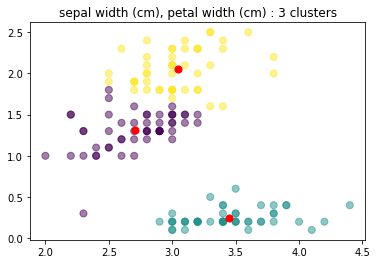

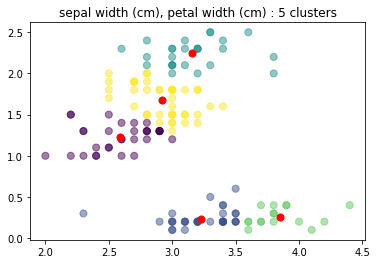

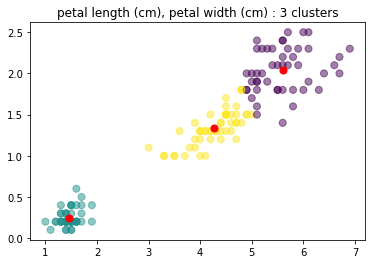

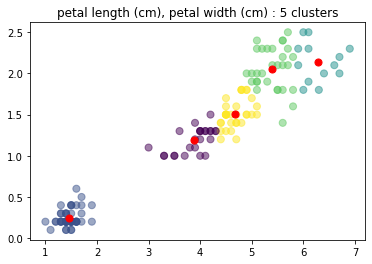

In [5]:
for i in range(len(combinations)):
    tmp_df = df[[combinations[i][0].name, combinations[i][1].name]]    
    kmeans = KMeans(n_clusters=3, max_iter=1000, init='random').fit(tmp_df)
    center = kmeans.cluster_centers_
    
    plt.figure(figsize=(6., 4.))
    plt.title(f'{combinations[i][0].name}, {combinations[i][1].name} : 3 clusters')
    plt.scatter(*combinations[i], c=kmeans.labels_.astype(float), s=50, alpha=.5)
    plt.scatter(center[:, 0], center[:, 1], c='red', s=50)
    
    kmeans = KMeans(n_clusters=5, max_iter=1000, init='random').fit(tmp_df)
    center = kmeans.cluster_centers_
    
    plt.figure(figsize=(6., 4.))
    plt.title(f'{combinations[i][0].name}, {combinations[i][1].name} : 5 clusters')
    plt.scatter(*combinations[i], c=kmeans.labels_.astype(float), s=50, alpha=.5)
    plt.scatter(center[:, 0], center[:, 1], c='red', s=50)
    
plt.show()

Here we can see all combinations together to verify that blue (sepal length, sepal width) are the most collect

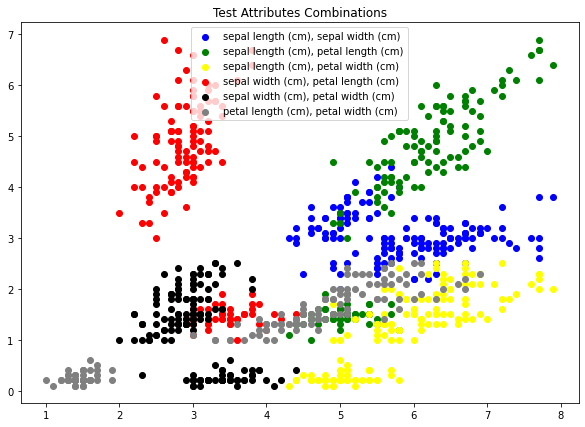

In [6]:
legend = []
plt.figure(figsize=(10., 7.))
plt.title('Test Attributes Combinations')

for i in range(len(colors)):
    plt.scatter(*combinations[i], color=colors[i])
    legend.append(f'{combinations[i][0].name}, {combinations[i][1].name}')
    
plt.legend(legend)
plt.show()

# More advanced tasks

##### K Means with PCA from Iris Data
The elbow test shows that 3 clusters is the most logical

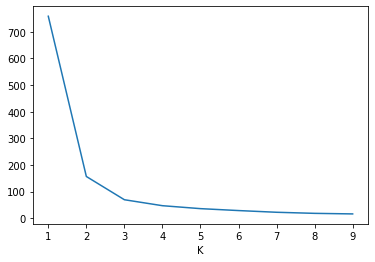

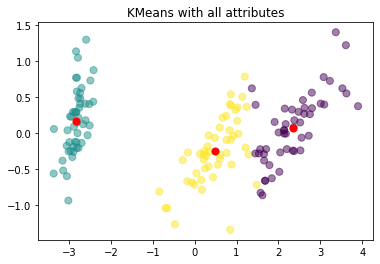

In [8]:
pca_df = pca_transformation(df)

plt.figure()
plt.xlabel('K')
plt.plot(*elbow_method(pca_df))

kmeans = KMeans(n_clusters=3, max_iter=1000, init='random').fit(pca_df)
center = kmeans.cluster_centers_

plt.figure()
plt.title('KMeans with all attributes')
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c=kmeans.labels_.astype(float), s=50, alpha=.5)
plt.scatter(center[:, 0], center[:, 1], c='red', s=50)

plt.show()

##### Test the CSV-file
It contains 1,500,000 data points, so both the elbow method and the k-means takes far longer time to calculate than the basic iris data set.<br>
The elbow method takes almost 2 minutes to calculate, so I commented out that cell for now. (__Please feel free to test it for yourself, but it takes time__)<br> 
The difference in k-means are also pretty large. The basic data set takes 0.02-0.03 seconds to calculate (and it doesn't matter if it's 3 or 5 clusters) and the special data set takes 5.5-6.5 seconds for 3 clusters and it takes approximately 14-16 seconds when I tested with 5 clusters.

In [9]:
csv_df = pd.read_csv('./special_iris.csv')
csv_df
print(csv_df.shape)

(1500000, 8)


##### Elbow method for the special data set

In [10]:
# timer_start = t.perf_counter()
# plt.figure()
# plt.xlabel('K')
# plt.plot(*elbow_method(csv_df))
# plt.show()
# timer_stop = t.perf_counter()
# print(f'It took {timer_stop - timer_start : .5f} seconds to calculate the elbow method for the csv-file')

##### Time the difference between the both data sets.

In [11]:
print(f'Time for k-means with the basic iris data set and 3 clusters: {timer_kmeans(df, 3, 1000) : .5f} seconds\n')
print(f'Time for k-means with the basic iris data set and 5 clusters: {timer_kmeans(df, 5, 1000) : .5f} seconds\n')
print(f'Time for k-means with the special iris data set and 3 clusters: {timer_kmeans(csv_df, 3, 1000) : .5f} seconds\n')
print(f'Time for k-means with the special iris data set and 5 clusters: {timer_kmeans(csv_df, 5, 1000) : .5f} seconds')

Time for k-means with the basic iris data set and 3 clusters:  0.02289 seconds

Time for k-means with the basic iris data set and 5 clusters:  0.02301 seconds

Time for k-means with the special iris data set and 3 clusters:  6.07853 seconds

Time for k-means with the special iris data set and 5 clusters:  14.53074 seconds
